The Loan Repayment dataset is made up of 1000 rows and six columns. Each row represents information about a particular person that relates to loan repayment. This dataset is perfect for classification algorithms such as the decision tree. The six columns are the following.

Initial payment.
Last payment.
Credit score.
House number.
Sum.
Result.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("loanssdataset.csv")
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


## Data Exploration

In [25]:
print(df.isnull().sum())

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB
None


In [29]:
print(df.describe())

       initial_payment  last_payment  credit_score  house_number  \
count      1004.000000   1004.000000   1004.000000   1004.000000   
mean        294.662351  12473.009960    528.902390   4041.282869   
std         115.844218   1442.134231    259.681745    618.431417   
min         100.000000  10005.000000    100.000000   3003.000000   
25%         195.750000  11213.500000    302.750000   3546.500000   
50%         290.000000  12467.000000    518.000000   4046.000000   
75%         398.000000  13690.000000    755.000000   4508.750000   
max         500.000000  14999.000000    997.000000   9876.000000   

                 sum  
count    1004.000000  
mean    17744.012948  
std      9594.659715  
min     13515.000000  
25%     16081.250000  
50%     17383.000000  
75%     18608.250000  
max    246789.000000  


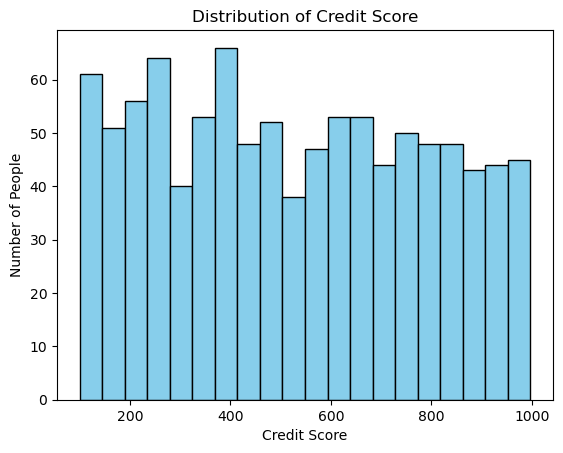

In [39]:
plt.hist(df['credit_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of People')
plt.show()

In [50]:
df = df.drop(columns=['house_number'])


## Data Prepocessing

In [63]:
x = df.drop('result', axis=1)
y = df['result']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = True)

## Modeling

In [68]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
# Prediction
result_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(result_df)

    Predicted Actual
954        No     No
613        No     No
597        No     No
372       yes    yes
754        No     No
..        ...    ...
987        No     No
894        No     No
889        No     No
135       yes    yes
571        No     No

[251 rows x 2 columns]


## Evaluation

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


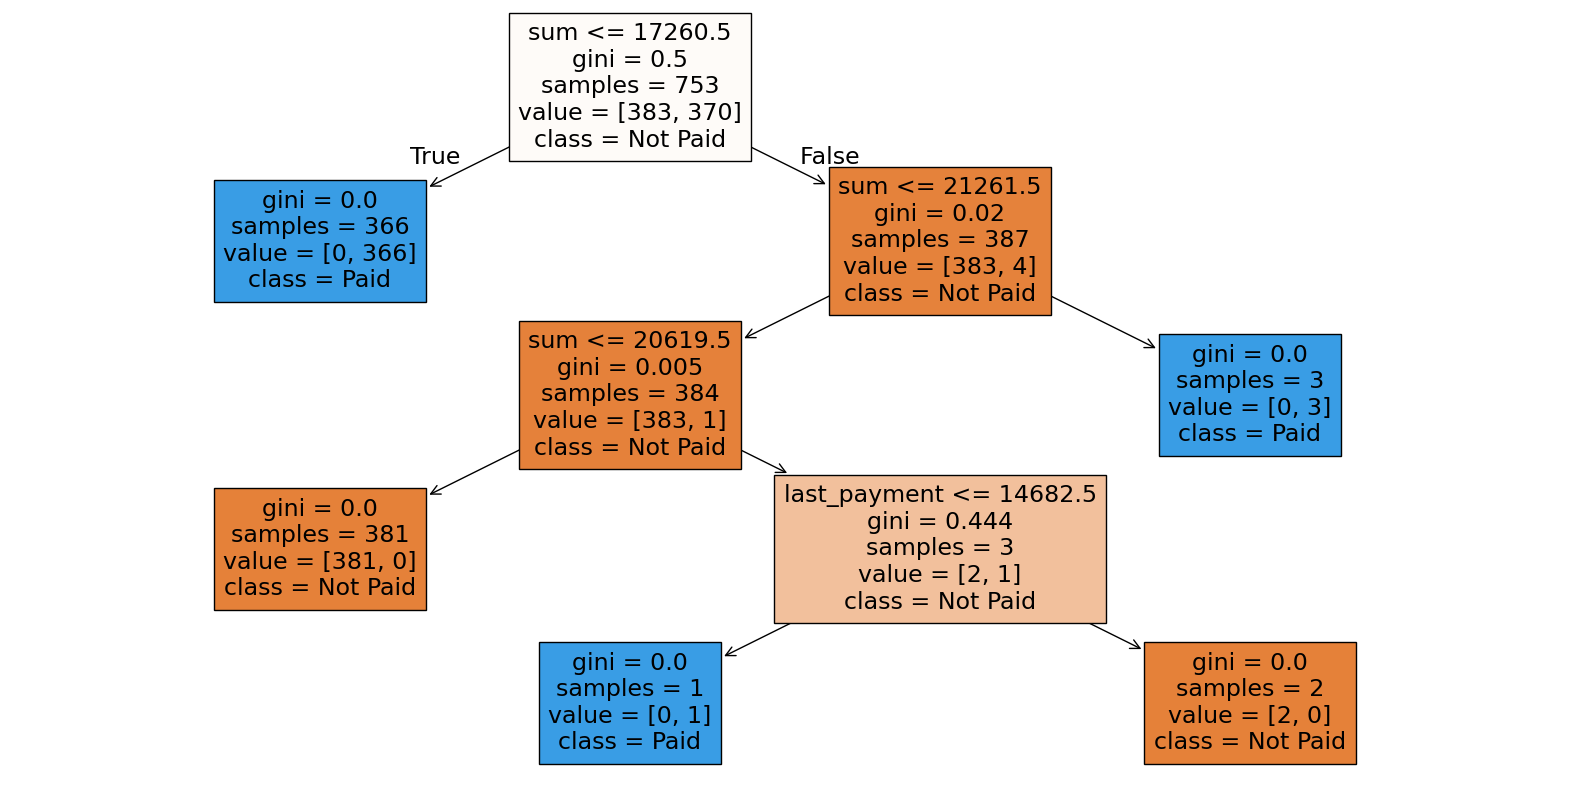

In [89]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=['Not Paid','Paid'], filled=True)
plt.show()

<Axes: >

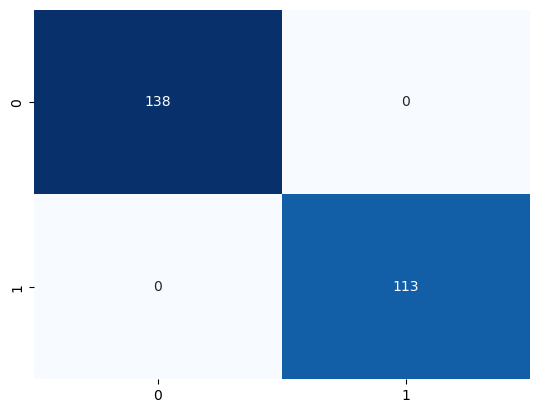

In [91]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)